In [53]:
import numpy as np
import scipy.io
import sklearn
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [54]:
mat = scipy.io.loadmat('Feature_all_sig.mat')
# mat = scipy.io.loadmat('Feature_stat_tex_fftnorm')
# mat['Feature'].shape[1]
# Feature_norm = np.zeros((mat['Feature'].shape[0], mat['Feature'].shape[1]))
# Feature_norm.shape

In [55]:
# for i in range(mat['Feature'].shape[1]):
#     max_value = np.max(np.abs(mat['Feature'][:,i]))
#     Feature_norm[:,i] = mat['Feature'][:,i] / max_value
    
# index = 1
# print(max_value, np.max(mat['Feature'][:,index]), np.max(Feature_norm[:,index]))   

In [56]:
CVD     = 1252
non_CVD = 1228
Y = np.zeros((CVD+non_CVD,1))
Y[:CVD] = 1

In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(mat['Feature_all_sig'], Y, test_size=0.2)

In [58]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1984, 33) (1984, 1) (496, 33) (496, 1)


In [59]:
Y_train = np.reshape(Y_train, (1984,1))
Y_test  = np.reshape(Y_test,  (496,1))
print(Y_train.shape, Y_test.shape)

(1984, 1) (496, 1)


In [60]:
rid = Ridge(alpha=1.0, max_iter=1000)
rid.fit(X_train, Y_train)

Ridge(max_iter=1000)

In [61]:
rid.coef_
rid.intercept_

array([3.89237959])

In [62]:
rid.predict(X_test)

array([[ 0.38962393],
       [ 0.69049739],
       [ 0.63997876],
       [ 0.20721443],
       [ 1.01735863],
       [ 0.72935965],
       [ 1.05584969],
       [ 0.22820632],
       [ 0.78428262],
       [ 0.5052874 ],
       [-0.01461702],
       [ 0.36027584],
       [ 0.50707431],
       [ 0.48722194],
       [ 0.61989498],
       [ 1.19260228],
       [ 0.29220837],
       [ 0.58271481],
       [ 0.61121768],
       [ 0.96071748],
       [ 0.19570307],
       [ 0.56334895],
       [ 0.25530216],
       [ 0.56182995],
       [ 0.62764638],
       [ 0.38906677],
       [ 0.52323721],
       [ 0.91540203],
       [ 0.57656388],
       [ 0.18531875],
       [ 0.85960659],
       [ 0.14287337],
       [ 0.17983951],
       [ 0.34681686],
       [ 0.5237132 ],
       [ 0.57404053],
       [ 0.4735222 ],
       [ 0.18433877],
       [ 0.34323202],
       [ 0.30825655],
       [ 0.91600313],
       [ 1.24390555],
       [ 0.15078166],
       [ 0.08949937],
       [ 0.70214874],
       [ 0

In [63]:
rid.predict(X_test).shape

(496, 1)

In [64]:
Y_pred = np.round(rid.predict(X_test))
Y_pred = np.reshape(Y_pred, (496,1))

In [65]:
print(Y_pred.shape, Y_test.shape, (Y_pred-Y_test).shape)

(496, 1) (496, 1) (496, 1)


In [66]:
1 - np.sum(abs(Y_pred-Y_test)) / Y_pred.shape[0]

0.8649193548387097

In [67]:
np.sum(abs(Y_pred-Y_test))

67.0

In [68]:
rid.coef_.shape

(1, 33)

In [69]:
rid.coef_

array([[-0.09110023,  0.0050454 , -0.12031999, -0.122536  , -0.0053089 ,
        -0.00248258,  0.32111389,  1.99203903,  0.01182824,  0.1550237 ,
         0.3136468 ,  0.00236169, -1.80775055, -0.31641148, -0.02419906,
        -0.62661718,  0.02912121,  0.059301  , -0.54655092,  0.83550675,
         0.08258066, -0.07142199, -0.09936293, -0.09201025,  0.07539946,
         0.45410817,  0.07530351, -0.12608097, -0.08274137, -0.68630659,
        -0.08525036, -0.00391572,  0.09275973]])

ValueError: shape mismatch: objects cannot be broadcast to a single shape

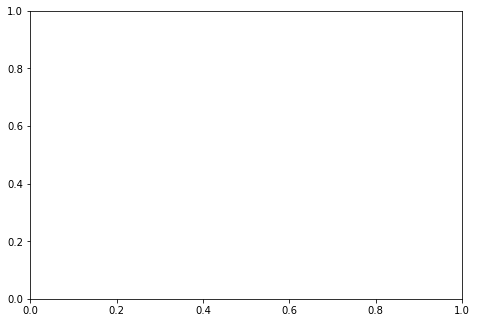

In [70]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax  = fig.add_axes([0,0,1,1])
x   = np.arange(13)
y   = rid.coef_
ax.bar(x, y)
plt.show()